In [230]:
# Velma Dhatri Reddy
# AI21BTECH11030
# ASSIGNMENT-3

Question - 2

In [231]:
import torch
import numpy as np
from math import sqrt
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
%matplotlib inline

In [232]:
# Defining the function
def f(x,y):
  return 10*x*x + y*y

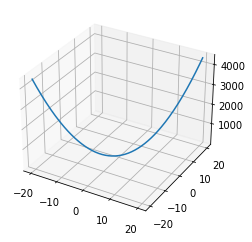

In [233]:
#Plot of the function

fig = plt.figure()
ax = plt.axes(projection='3d')
x = np.linspace(-20, 20, 200)
y = np.linspace(-20, 20, 200)
z = f(x,y)

ax.plot3D(x,y,z)
plt.show()


In [234]:
# Partial derivate of f(x, y) wrt x
def x_derv(x,y):
  return 20*x

In [235]:
# Partial derivate of f(x, y) wrt y
def y_derv(x,y):
  return 2*y

In [236]:
# Choosing a random point for the initial point
x_0, y_0 = random.choice(x), random.choice(y)
print(x_0, y_0)

-7.738693467336683 16.18090452261307


2(a)

In [237]:
# Defining function for Vanilla SGD
def grad_desc(f, x_derv, y_derv, n_iter, step_size, a, b):
  ax = []
  ay = []
  for i in range(n_iter):
    ax.append(a)
    ay.append(b)
    grad_x = x_derv(a, b)
    grad_y = y_derv(a, b)
    a = a - step_size*grad_x
    b = b - step_size*grad_y

  return(ax, ay)

In [238]:
a, b = x_0, y_0
values1 = grad_desc(f, x_derv, y_derv, 50, 0.01, a, b)
print(values1)

([-7.738693467336683, -6.190954773869346, -4.952763819095477, -3.9622110552763816, -3.1697688442211054, -2.535815075376884, -2.0286520603015075, -1.6229216482412059, -1.2983373185929648, -1.0386698548743718, -0.8309358838994975, -0.664748707119598, -0.5317989656956784, -0.42543917255654273, -0.3403513380452342, -0.2722810704361874, -0.2178248563489499, -0.17425988507915993, -0.13940790806332795, -0.11152632645066236, -0.08922106116052989, -0.07137684892842391, -0.05710147914273913, -0.045681183314191305, -0.03654494665135304, -0.029235957321082435, -0.02338876585686595, -0.01871101268549276, -0.014968810148394207, -0.011975048118715366, -0.009580038494972293, -0.0076640307959778345, -0.006131224636782268, -0.004904979709425814, -0.0039239837675406515, -0.003139187014032521, -0.002511349611226017, -0.0020090796889808134, -0.0016072637511846508, -0.0012858110009477206, -0.0010286488007581764, -0.0008229190406065411, -0.0006583352324852329, -0.0005266681859881863, -0.00042133454879054907,

2(b)

In [239]:
# Defining function for SGD with momentum
def momentum_sgd(f, x_derv, y_derv, n_iter, step_size, a, b, rho):
  ax = []
  ay = []

  v_x=0
  v_y=0

  for i in range(n_iter):
    ax.append(a)
    ay.append(b)

    grad_x = x_derv(a, b)
    grad_y = y_derv(a, b)

    v_x = rho * v_x + grad_x
    v_y = rho * v_y + grad_y

    a = a - step_size*v_x
    b = b - step_size*v_y

  return(ax, ay)


In [240]:
a, b = x_0, y_0
values2 = momentum_sgd(f, x_derv, y_derv, 50, 0.01, a, b, 0.8)
print(values2)

([-7.738693467336683, -6.190954773869346, -3.7145728643216076, -0.9905527638190952, 1.386773869346734, 3.0112804020100503, 3.7086295477386932, 3.524782954773869, 2.672749089447236, 1.456572179296482, 0.1923162153165825, -0.8575517989306538, -1.5259358505423122, -1.7554559217231764, -1.5879807943232325, -1.1364045335386308, -0.5478626182032232, 0.03254343770574741, 0.4903595948917745, 0.7585406016622412, 0.8213772867461664, 0.7073711774640732, 0.47469205454558405, 0.19361034530167592, -0.06997709115378575, -0.266851622087398, -0.3709809224168082, -0.3800881781969747, -0.311356347181713, -0.19409961293316103, -0.061474302947687215, 0.05692080563022929, 0.14025273136651661, 0.17886772568224318, 0.1739861759983758, 0.13528370105160673, 0.07726498088387011, 0.015397008572906795, -0.037176770990445224, -0.0718004404430378, -0.0851392879165043, -0.07878250831197664, -0.05794058296595918, -0.02967892609595337, -0.00113381538075805, 0.021929036267549818, 0.03599351033268615, 0.04004638751825798

2(c)

In [241]:
# Defining function for Nesterov momentum
def nesterov(f, x_derv, y_derv, n_iter, step_size, a, b, rho):

  ax = []
  ay = []

  v_x=0
  v_y=0

  for i in range(n_iter):
    ax.append(a)
    ay.append(b)

    grad_x = x_derv(a + rho * v_x, b + rho * v_y)
    grad_y = y_derv(a + rho * v_x, b + rho * v_y)

    v_x = rho * v_x + grad_x
    v_y = rho * v_y + grad_y

    a = a - step_size*v_x
    b = b - step_size*v_y

  return(ax, ay)



In [242]:
a, b = x_0, y_0

values3 = nesterov(f, x_derv, y_derv, 50, 0.1, a, b, 0.9)
print(values3)

([-7.738693467336683, 7.738693467336683, 284.78391959799, 4951.3708542713575, 83247.12221105529, 1396542.5784321611, 23424741.54414674, 392908218.9078588, 6590329503.266299, 110540932771.10822, 1854125468991.104, 31099622265566.82, 521640267189714.1, 8749577921876671.0, 1.4675844375170678e+17, 2.4616091204320824e+18, 4.128906866882702e+19, 6.925499167958375e+20, 1.161628011280466e+22, 1.948422205917621e+23, 3.268128054460533e+24, 5.481697420565923e+25, 9.194562180519963e+26, 1.5422225490643775e+28, 2.5868011376134086e+29, 4.338893974554835e+30, 7.2777147994442205e+31, 1.2207058529814293e+33, 2.047514667127263e+34, 3.4343378479443114e+35, 5.760484475733264e+36, 9.66217735830107e+37, 1.6206565905445325e+39, 2.718360145002823e+40, 4.559560563942138e+41, 7.647843342050893e+42, 1.2827882635686033e+44, 2.1516467526230384e+45, 3.6090007053807726e+46, 6.053450026385829e+47, 1.0153574413913666e+49, 1.7030796145918538e+50, 2.8566099536964504e+51, 4.791449769958786e+52, 8.036795806977598e+53, 1.3

2(d)

In [243]:
# Defining function for Ada Grad
def adagrad(f, x_derv, y_derv, n_iter, step_size, a, b, epsilon):

  ax = []
  ay = []

  grad_sq_x = 0
  grad_sq_y = 0

  for i in range(n_iter):

    ax.append(a)
    ay.append(b)

    grad_x = x_derv(a, b)
    grad_y = y_derv(a, b)

    grad_sq_x += grad_x**2
    grad_sq_y += grad_y**2

    a = a - step_size*(grad_x/ (sqrt(grad_sq_x) + epsilon))
    b = b - step_size*(grad_y/ (sqrt(grad_sq_y) + epsilon))

  return(ax, ay)


In [244]:
a, b = x_0, y_0

values4 = adagrad(f, x_derv, y_derv, 50, 2.5, a, b, 1e-8)
print(values4)

([-7.738693467336683, -5.238693467498209, -3.8372419808030855, -2.887642348758966, -2.2005576104332834, -1.6880769859246252, -1.2997186817635367, -1.0028219999668246, -0.774701534970585, -0.598909789861867, -0.4632082644765657, -0.35834648090262755, -0.2772661411861126, -0.21455097781868593, -0.16603057383923156, -0.1284872255664759, -0.09943525746635971, -0.07695307605039713, -0.059554507745765685, -0.04608983296427703, -0.03566947614785772, -0.02760507861811778, -0.021363954325050956, -0.01653387043632867, -0.012795803469604478, -0.009902860862973458, -0.00766397084736963, -0.005931261085388897, -0.004590291409257244, -0.0035524950678988087, -0.00274932902348065, -0.002127746837964356, -0.0016466950998903337, -0.0012744019694469445, -0.0009862787488645205, -0.0007632958790971217, -0.0005907261006311843, -0.00045717176742151287, -0.000353812070866976, -0.00027382045530926027, -0.0002119137472296011, -0.00016400321961549823, -0.0001269245454659982, -9.822880477486614e-05, -7.6020741710

2(e)

In [245]:
def RMSprop(f, x_derv, y_derv, n_iter, step_size, a, b, epsilon, rho):

  ax = []
  ay = []

  grad_sq_x = 0
  grad_sq_y = 0

  for i in range(n_iter):

    ax.append(a)
    ay.append(b)

    grad_x = x_derv(a, b)
    grad_y = y_derv(a, b)

    grad_sq_x = rho*grad_sq_x + (1 - rho)*grad_x**2
    grad_sq_y = rho*grad_sq_y + (1 - rho)*grad_y**2

    a = a - step_size*grad_x/ (epsilon + sqrt(grad_sq_x))
    b = b - step_size*grad_y/ (epsilon + sqrt(grad_sq_y))

  return(ax, ay)

In [246]:
a, b = x_0, y_0

values5 = RMSprop(f, x_derv, y_derv, 50, 1.5, a, b, 1e-5, 0.9)
print(values5)

([-7.738693467336683, -2.99527794623976, -1.2034123332634121, -0.4540812655310663, -0.15662985802585494, -0.04850566453645658, -0.013211126416612082, -0.0030782524475022645, -0.0005895343516312511, -8.712313721235762e-05, -8.859062922390664e-06, -4.7034730483583606e-07, -8.802906662788543e-10, 4.5880503279767205e-11, -5.0024219913432555e-12, 8.455186987639784e-13, -1.9637782037973298e-13, 5.869990856789613e-14, -2.1670516656939462e-14, 9.605169146414012e-15, -5.007223281081024e-15, 3.022341403225932e-15, -2.0864397207966407e-15, 1.6311233903302217e-15, -1.4323778103115699e-15, 1.403369667041573e-15, -1.525235234854538e-15, 1.829855410250558e-15, -2.413045908612019e-15, 3.4847598925271122e-15, -5.493175371493664e-15, 9.424659628060096e-15, -1.7554395381577197e-14, 3.54150783076611e-14, -7.722857052180004e-14, 1.8169716594348915e-13, -4.604345135812338e-13, 1.2547961454242986e-12, -3.6724760285389394e-12, 1.1528485535917283e-11, -3.877094440637357e-11, 1.3953913571080136e-10, -5.36924184

In [247]:
import imageio

time = []

for i in range(50):
  time.append(i)

def create_frame(t):
  plt.figure()
  plt.xlim([-20, 20])
  plt.ylim([-20, 20])

  plt.plot(values1[0][:(t+1)], values1[1][:(t+1)], color= 'red', marker = 'o', label = 'sgd')
  plt.plot(values2[0][:(t+1)], values2[1][:(t+1)], color= 'black', marker = 'o', label = 'sgd + m')
  plt.plot(values3[0][:(t+1)], values3[1][:(t+1)], color= 'green', marker = 'o', label = 'nesterov')
  plt.plot(values4[0][:(t+1)], values4[1][:(t+1)], color= 'blue', marker = 'o', label = 'adaGrad')
  plt.plot(values5[0][:(t+1)], values5[1][:(t+1)], color= 'yellow', marker = 'o', label = 'RMSProp')
  plt.legend()




  plt.savefig(f'./img/img_{t}.png', transparent = False, facecolor = 'white')
  plt.close()

  print()


In [248]:
for t in time:
  create_frame(t)

In [249]:
frames = []

for t in time:
  image = imageio.imread(f'./img/img_{t}.png')
  frames.append(image)

  imageio.mimsave('./plot.gif', frames, fps = 5)

Question - 1

(a)

In [250]:
# considering resnet50 model
model = models.resnet50(pretrained=True)

In [251]:
# Appending all the images in imgs
imgs = []
for i in range(5):
    imgs.append(Image.open(f'./i{i+1}.jpg'))

In [252]:
# Transforming the images
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

transimgs = []
for img in imgs:
    img = transform(img).unsqueeze(0)
    img.requires_grad = True    
    transimgs.append(img)

In [253]:
#Calculating the maximum index in each case
out_img = []
for img in transimgs:
    out_img.append(model(img))

max_index = []
for x in out_img:
    values = torch.nn.functional.softmax(x, dim=1)[0]
    index = torch.argmax(values)
    max_index.append(index)


In [254]:
# Vanilla Backpropagation 
# Calculating the gradient 

vanilla_backprop = []
for i in range(5):
    one_hot_code = torch.zeros((1, out_img[i].size()[-1]))
    one_hot_code[0][max_index[i]] = 1.0

    out_img[i].backward(gradient=one_hot_code, retain_graph=True)

    grad = transimgs[i].grad.data.numpy()[0]
    grad = (grad-np.min(grad))/(np.max(grad)-np.min(grad)+1e-8)
    vanilla_backprop.append(grad.transpose(1, 2, 0))


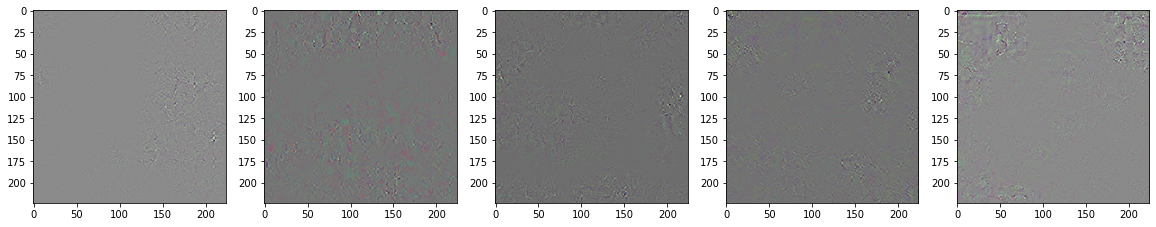

In [229]:
# Visualizing of images
figure, axis = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, img in enumerate(vanilla_backprop):
    axis[i].imshow(img)